# 🇮🇹 Sistema giudiziario italiano (2003–2024)  
## Serie storica nazionale sul carico della giustizia civile e penale

Questo notebook presenta un’analisi esplorativa di una serie storica nazionale che descrive il carico del sistema giudiziario civile e penale italiano tra il 2003 e il 2024.

Il dataset utilizza dati amministrativi aggregati del Ministero della
Giustizia e dati demografici ISTAT, e costruisce una serie di indicatori strutturali progettati per misurare:

- la pressione del sistema giudiziario sulla popolazione  
- la struttura del contenzioso civile  
- il peso delle esecuzioni e delle procedure concorsuali  
- l’incidenza delle infrazioni penali minori  

L’obiettivo del notebook è fornire una lettura trasparente e riproducibile delle principali dinamiche di lungo periodo del sistema giudiziario italiano.

### Origine dei dati di base

I fogli *civile* e *penale* contengono dati amministrativi aggregati
pubblicati dal Ministero della Giustizia e rappresentano il numero di
procedimenti pendenti per anno e per livello di competenza giudiziaria
a livello nazionale.

Tali dati costituiscono la base ufficiale utilizzata per la costruzione
degli indicatori strutturali riportati nel foglio *indicatori*.

### Costruzione degli indicatori

Il foglio *indicatori* contiene indicatori strutturali derivati
calcolati a partire dai dati amministrativi dei fogli *civile* e *penale*.

Gli indicatori sono costruiti come rapporti standardizzati su base annuale:

• **Pressione civile** = procedimenti civili pendenti / popolazione residente × 100000  
• **Pressione penale** = procedimenti penali pendenti / popolazione residente × 100000  
• **Conflittualità** = area SICID / totale procedimenti civili  
• **Crisi economica** = area SIECIC / totale procedimenti civili  
• **Micro-illegalità** = procedimenti del Giudice di Pace / totale procedimenti penali  

Gli indicatori sono espressi come valori numerici puri e consentono confronti
coerenti nel tempo e tra diverse strutture del sistema giudiziario.

### Nota sui valori mancanti

Alcune colonne possono contenere valori `NaN`.
Ciò è dovuto alla struttura delle serie storiche e al fatto che
alcuni indicatori o variazioni non sono definibili per tutti gli anni.

La presenza di `NaN` non rappresenta errori nei dati e può comportare
una lieve compressione visiva delle distribuzioni nei grafici.

In [1]:
# Questo ambiente Python è fornito da Kaggle e contiene già le principali librerie
# per l'analisi dei dati (pandas, numpy, matplotlib, ecc.).
import pandas as pd
import matplotlib.pyplot as plt
import os

# Importiamo la funzione display per visualizzare le tabelle in formato tabellare pulito nel notebook
from IPython.display import display

# Disabilita i warning di formattazione numerica generati automaticamente da pandas
# per mantenere l’output pulito e focalizzato sui contenuti del dataset.
import warnings
warnings.filterwarnings("ignore")

# Visualizziamo tutti i file disponibili nella cartella di input del notebook.
# Questo permette a chi legge di capire quali dataset sono caricati nel progetto.
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/italy-justice-system-2003-2024/indicatori.csv
/kaggle/input/italy-justice-system-2003-2024/civile.csv
/kaggle/input/italy-justice-system-2003-2024/penale.csv


In [2]:
# Caricamento dei fogli
civile = pd.read_csv('/kaggle/input/italy-justice-system-2003-2024/civile.csv')
penale = pd.read_csv('/kaggle/input/italy-justice-system-2003-2024/penale.csv')
indicatori = pd.read_csv('/kaggle/input/italy-justice-system-2003-2024/indicatori.csv')

In [3]:
# Visualizzazione foglio civile
display(civile.head())

,anno,cassazione,corte_appello,tribunale_ordinario,tribunale_minorenni,giudice_pace,pendenti_totali_nazionali,area_siecic,area_sicid,variazione_vs_anno_precedente,variazione_area_siecic,variazione_area_sicid
0,2003,1070300,2600900,91837,1175700,7881400,140500,7470000,171800,NaN,NaN,NaN
1,2004,1050600,2990800,81725,1104000,9571600,163815,7305900,42716,3.3,-2.8,4.5
2,2005,962100,3381600,80707,1125700,13034,182935,7150700,65008,2.4,-3.0,3.3
3,2006,1132500,3591100,83023,1334600,42445,65010,6833700,110633,4.8,-3.6,6.3
4,2007,1114800,3843900,83236,1390600,72212,100321,6534900,144932,3.9,-3.7,5.0


In [4]:
# Visualizzazione foglio penale
display(penale.head())

,anno,cassazione,corte_appello,tribunale_ordinario,tribunale_minorenni,pendenti_totali_nazionali_escluso_giudice_pace,variazione_vs_anno_precedente_escluso_giudice_pace,giudice_pace,pendenti_totali_nazionali_incluso_giudice_pace,variazione_vs_anno_precedente_incluso_giudice_pace
0,2003,31140,130395,1139953,36061,1337549,NaN,60379,1397928,NaN
1,2004,30953,135322,1184940,39847,1391062,4.0,76113,1467175,5.0
2,2005,32862,140822,1165732,38671,1378087,-0.9,81208,1459295,-0.5
3,2006,37439,154844,1194511,40407,1427201,3.6,105987,1533188,5.1
4,2007,33177,157996,1195646,38568,1425387,-0.1,116857,1542244,0.6


In [5]:
# Visualizzazione foglio indicatori
display(indicatori.head())

,anno,popolazione,pressione_civile,pressione_penale,conflittualita,crisi_economica,micro_illegalita
0,2003,57186378,8039.47,2444.51,0.84,0.16,0.04
1,2004,57611990,8242.41,2546.65,0.85,0.15,0.05
2,2005,58044368,8375.52,2514.10,0.86,0.14,0.06
3,2006,58288996,8744.10,2630.32,0.87,0.13,0.07
4,2007,58510725,9048.87,2635.83,0.88,0.12,0.08


## Andamento della pressione giudiziaria

Questo grafico mostra l’andamento nel tempo della pressione civile e penale
sulla popolazione residente.

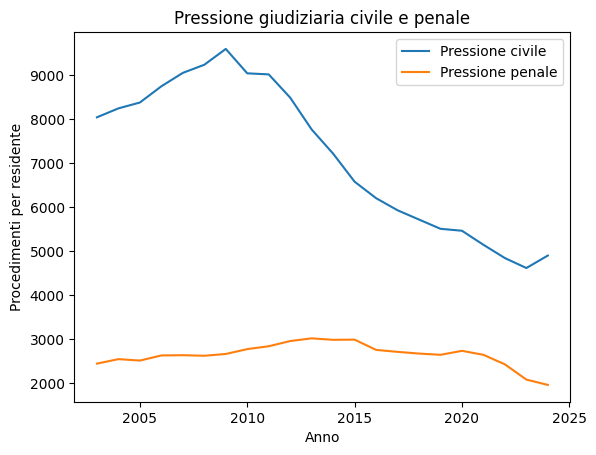

In [6]:
# Confronto tra pressione civile e pressione penale nel tempo
plt.figure()
plt.plot(indicatori['anno'], indicatori['pressione_civile'], label='Pressione civile')
plt.plot(indicatori['anno'], indicatori['pressione_penale'], label='Pressione penale')
plt.xlabel('Anno')
plt.ylabel('Procedimenti per residente')
plt.title('Pressione giudiziaria civile e penale')
plt.legend()
plt.show()

## Struttura del contenzioso civile

Il grafico mostra la composizione strutturale del contenzioso civile
tra area SICID (conflittualità) e area SIECIC (crisi economica).

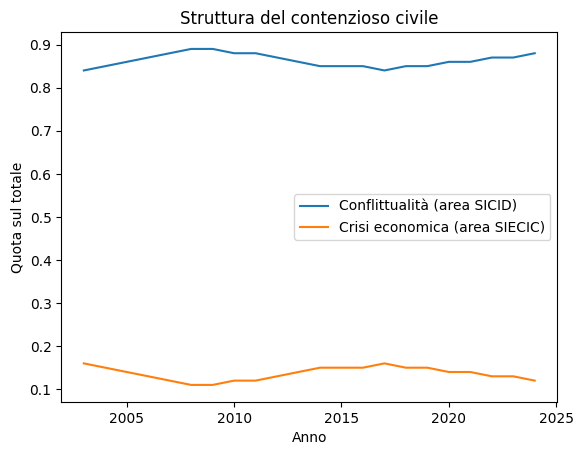

In [7]:
# Composizione strutturale del contenzioso civile
plt.figure()
plt.plot(indicatori['anno'], indicatori['conflittualita'], label='Conflittualità (area SICID)')
plt.plot(indicatori['anno'], indicatori['crisi_economica'], label='Crisi economica (area SIECIC)')
plt.xlabel('Anno')
plt.ylabel('Quota sul totale')
plt.title('Struttura del contenzioso civile')
plt.legend()
plt.show()

## Micro-illegalità

Il grafico rappresenta l’incidenza dei procedimenti penali di competenza
del Giudice di Pace sul totale nazionale.

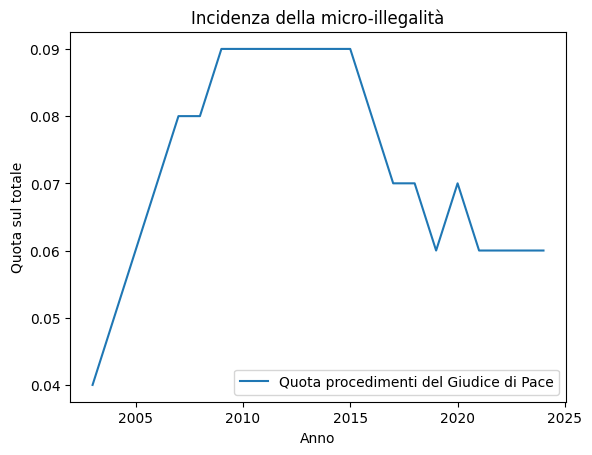

In [8]:
# Incidenza dei procedimenti penali di competenza del Giudice di Pace
plt.figure()
plt.plot(indicatori['anno'], indicatori['micro_illegalita'],
         label='Quota procedimenti del Giudice di Pace')
plt.xlabel('Anno')
plt.ylabel('Quota sul totale')
plt.title('Incidenza della micro-illegalità')
plt.legend()
plt.show()

# Conclusioni

L’analisi evidenzia dinamiche strutturali di lungo periodo molto chiare nel sistema giudiziario italiano:

- La pressione della giustizia civile raggiunge il massimo intorno al 2009, in coincidenza con la crisi finanziaria globale.  
- A partire dal 2010 si osserva una riduzione strutturale sia del carico civile sia di quello penale.  
- La quota di esecuzioni e procedure concorsuali diminuisce progressivamente nel tempo, segnalando una graduale normalizzazione del sistema civile.  
- Le infrazioni penali minori trattate dal Giudice di Pace mostrano una riduzione costante nel lungo periodo.

Nel complesso, il sistema giudiziario italiano appare fortemente sensibile alle dinamiche economiche e sociali, confermandosi come un importante indicatore strutturale dello stato di salute del Paese.